# **Advanced Secure Messaging System A Unified Approach Using AES and RSA**


# context
1.   Setup and Key Generation
2.   AES
3.   RSA
4.   RSA Encryption and Decryption of AES Key
5.   Original message & Decrypted message
6.   Data Visualization
7.   Finding rouge score, F1 score.





code

In [ ]:
pip install cryptography


In [ ]:
import pandas as pd
from cryptography.hazmat.primitives.asymmetric import rsa, padding
from cryptography.hazmat.primitives import serialization, hashes
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.backends import default_backend
import os
import base64

Load the data

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/SE_Data_sets/spam.csv", encoding='latin-1')

In [ ]:
print(data.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


Generate RSA keys

In [ ]:

private_key = rsa.generate_private_key(
    public_exponent=65537,
    key_size=2048,
    backend=default_backend()
)

public_key = private_key.public_key()

Serialize keys

In [ ]:
pem_private_key = private_key.private_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PrivateFormat.TraditionalOpenSSL,
    encryption_algorithm=serialization.NoEncryption()
)

pem_public_key = public_key.public_bytes(
    encoding=serialization.Encoding.PEM,
    format=serialization.PublicFormat.SubjectPublicKeyInfo
)

 Save keys to files

In [ ]:
with open("private_key.pem", "wb") as private_file:
    private_file.write(pem_private_key)

with open("public_key.pem", "wb") as public_file:
    public_file.write(pem_public_key)

print("RSA keys generated and saved.")

RSA keys generated and saved.


AES


In [ ]:
def aes_encrypt(message, key):
    iv = os.urandom(16)  # Initialization vector
    cipher = Cipher(algorithms.AES(key), modes.CFB(iv), backend=default_backend())
    encryptor = cipher.encryptor()
    ciphertext = encryptor.update(message) + encryptor.finalize()
    return iv + ciphertext

In [ ]:
def aes_decrypt(ciphertext, key):
    iv = ciphertext[:16]
    cipher = Cipher(algorithms.AES(key), modes.CFB(iv), backend=default_backend())
    decryptor = cipher.decryptor()
    message = decryptor.update(ciphertext[16:]) + decryptor.finalize()
    return message

RSA Encryption and Decryption of AES Key

In [ ]:
def rsa_encrypt_key(aes_key, public_key):
    encrypted_key = public_key.encrypt(
        aes_key,
        padding.OAEP(
            mgf=padding.MGF1(algorithm=hashes.SHA256()),
            algorithm=hashes.SHA256(),
            label=None
        )
    )
    return encrypted_key

In [ ]:
def rsa_decrypt_key(encrypted_key, private_key):
    decrypted_key = private_key.decrypt(
        encrypted_key,
        padding.OAEP(
            mgf=padding.MGF1(algorithm=hashes.SHA256()),
            algorithm=hashes.SHA256(),
            label=None
        )
    )
    return decrypted_key

Original message & Decrypted message

In [ ]:
if 'text' not in data.columns:
    if 'v2' in data.columns:
        data.rename(columns={'v2': 'text'}, inplace=True)


private_key = rsa.generate_private_key(
    public_exponent=65537,
    key_size=2048,
    backend=default_backend()
)

public_key = private_key.public_key()


results = []
for index, row in data.head(10).iterrows():
    message = row['text'].encode('utf-8')
    aes_key = os.urandom(32)


    ciphertext = aes_encrypt(message, aes_key)


    encrypted_aes_key = rsa_encrypt_key(aes_key, public_key)


    decrypted_aes_key = rsa_decrypt_key(encrypted_aes_key, private_key)

    decrypted_message = aes_decrypt(ciphertext, decrypted_aes_key)


    decrypted_message_base64 = base64.b64encode(decrypted_message).decode('utf-8')

    result = {
        "Index": index,
        "Original Message": message.decode('utf-8'),
        "Encrypted Message": ciphertext,
        "Decrypted Message (Base64)": decrypted_message_base64
    }
    results.append(result)




In [ ]:
random_bytes = os.urandom(32)

print(random_bytes.hex())


ea07d9d0b351a462ee45589572bad6efecdc58a5f9c103e51ba8ad4d941dd5da


In [ ]:
print(data.columns)

Index(['v1', 'text', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [ ]:
for result in results:
    print(f"Message Index: {result['Index']}")
    print(f"Original Message: {result['Original Message']}")
    print(f"Encrypted Message: {result['Encrypted Message']}")
    print(f"Decrypted Message (Base64): {result['Decrypted Message (Base64)']}")
    print("-" * 50)

Message Index: 0
Original Message: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Encrypted Message: b"\xd7\xadZL\xd1\xdf\x9b\xcf\xa3\xbfn\xc5R$\xa9\xbe\xa0J\xc27\xc5!\x86\x17\xf2\nj\x1f-\n!\x1fk\x85(\xf9\xb1\x10\xb7\xb0\xb6\xfd\x03 \x87\xe1z\xb8-\xfc\t\x06\x07\xc2\xf80\x9c\xa8\x0b\x8a\xd2=\x1a\xd1H\x85\xbf'\xec\xfe2\xfe/l\xacf` \xec\x8c\x1b\xd0\x8b\xe9U\x8f\x9d\x99\x83\x0f\x94\x8e\xf4A\x8c\xae\xb01$,f\x13c$\xe5\x10\rk}\x9d9\x91-\x90\t\xb6kU\xa0\x85\x1c\xd5\xa0\xa8\xd7\x8eh"
Decrypted Message (Base64): R28gdW50aWwganVyb25nIHBvaW50LCBjcmF6eS4uIEF2YWlsYWJsZSBvbmx5IGluIGJ1Z2lzIG4gZ3JlYXQgd29ybGQgbGEgZSBidWZmZXQuLi4gQ2luZSB0aGVyZSBnb3QgYW1vcmUgd2F0Li4u
--------------------------------------------------
Message Index: 1
Original Message: Ok lar... Joking wif u oni...
Encrypted Message: b'7\xaf\x89\xbfpVa^\x93vZ\xc7\x9e\xa3iB/\xe8\n8\xe7I\xc85u\x8b\xcb\x1d\x98\x19\xc6\xe1S\x80lv\xd5+\xc5\xb1\x04\xa3\x7fk\xaf'
Decrypted Message 



# **Data Visualization**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

Check the actual column names

In [ ]:
print(data.columns)

Index(['v1', 'text', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


Adjust the column names as needed

In [ ]:
data.columns = ['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

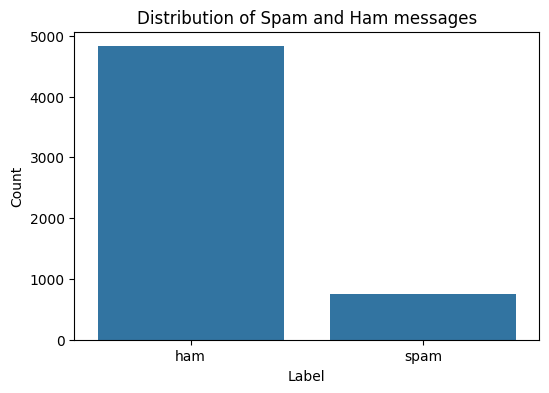

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=data)
plt.title('Distribution of Spam and Ham messages')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [ ]:
spam_words = ' '.join(list(data[data['label']=='spam']['message']))
ham_words = ' '.join(list(data[data['label']=='ham']['message']))

spam_wordcloud = WordCloud(width=600, height=400, background_color='black').generate(spam_words)
ham_wordcloud = WordCloud(width=600, height=400, background_color='white').generate(ham_words)

(-0.5, 599.5, 399.5, -0.5)

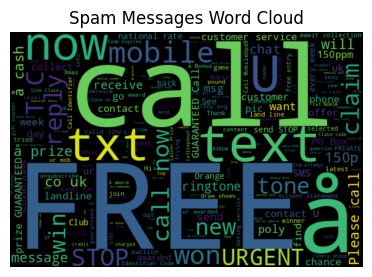

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Spam Messages Word Cloud')
plt.axis('off')

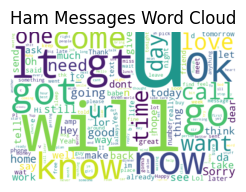

In [ ]:
plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Ham Messages Word Cloud')
plt.axis('off')

plt.show()

# **Finding rouge score, F1 score.**

In [ ]:
pip install rouge


In [ ]:
from rouge import Rouge

In [ ]:
reference = "This is a reference summary."
hypothesis = "This is a generated summary."

In [ ]:
rouge = Rouge()

In [ ]:
scores = rouge.get_scores(hypothesis, reference)[0]

In [ ]:
# Extract precision, recall, and F1 score
precision = scores['rouge-1']['p']
recall = scores['rouge-1']['r']
f1_score = scores['rouge-1']['f']

In [ ]:
print(f"Precison: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")

Precison: 0.8000
Recall: 0.8000
F1 Score: 0.8000
